Using the phugoid model, write new code to analyze the flight of a paper airplane

In [67]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [68]:
# model parameters:
g = 9.8      # gravity in m s^{-2}
v_t = 4.9   # trim velocity in m s^{-1}   
C_D = 1/5  # drag coefficient --- or D/L if C_L=1
C_L = 1   # for convenience, use C_L = 1

### set initial conditions ###
v0 = v_t     # start at the trim velocity (or add a delta)
theta0 = 0 # initial angle of trajectory
x0 = 0     # horizotal position is arbitrary
y0 = 2  # initial altitude


thetaValues = numpy.linspace(-30,30,50)*numpy.pi/180
velocityValues = numpy.linspace(0,20,50)

In [69]:
def f(u):
    v = u[0]
    theta= u[1]
    x = u[2]
    y = u[3]
    return numpy.array([-g*numpy.sin(theta)-C_D/C_L*g/v_t**2*v**2, -g*numpy.cos(theta)/v+g/v_t**2*v,v*numpy.cos(theta), v*numpy.sin(theta)])

In [70]:
def euler_step(u, f, dt):
    return u + dt*f(u)

In [71]:
T = 10 #final time
dt = 0.001 #time increment
N = int(T/dt) + 1 #number of time-steps
u = numpy.empty((N, 4))
xmax = 0.

In [72]:
for theta in thetaValues:

    for velocity in velocityValues:
        N = int(T/dt) + 1 #number of time-steps

#initialize the array containing the solution for each time-step
        u[0]= numpy.array([velocity, theta, x0, y0]) #fill 1st element with initial values
    
    #time loop - Euler method
        for n in range(N-1):
            
            u[n+1] = euler_step(u[n], f, dt)
            
            if u[n+1, 3] <= 0:
                xtest = u[n+1,2]
                break
                
        if xtest > xmax:
           
        # print(xtest) 

            xmax = xtest
            v_xmax = velocity
            theta_xmax = theta


/home/gil/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars
/home/gil/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in sin
/home/gil/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: invalid value encountered in cos


In [65]:
print('The optimal launch angle is:')
print(theta_xmax)
print()
print('The optimal velocity is:')
print(v_xmax)
print()
print('The longest distance the paper airplane can travel is:')
print(xmax)

The optimal launch angle is:
-0.203028096661

The optimal velocity is:
15.9183673469

The longest distance the paper airplane can travel is:
18.9623956432


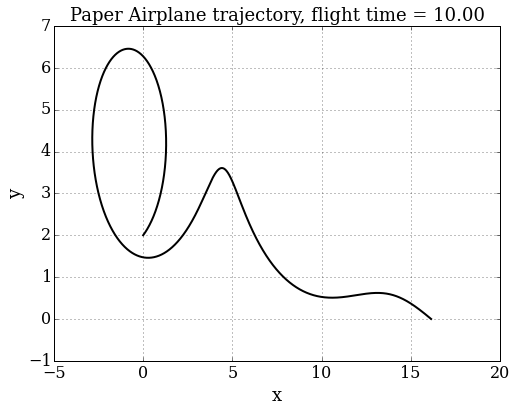

In [66]:
x = u[:,2]
y = u[:,3]

# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'y', fontsize=18)
pyplot.title('Paper Airplane trajectory, flight time = %.2f' % T, fontsize=18)
pyplot.plot(x,y, 'k-', lw=2);